<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
HEART DISEASE PREDICTION END TO END PROJECT
</p>
</div>

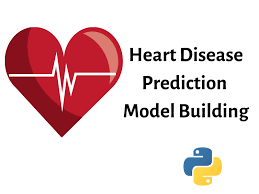

# NOTEBOOK: CONTENT
<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

💡 Basic Understanding of Data.<br>

💡 Exploratory Data Analysis (EDA).<br>

💡 Feature Engineering.<br>

💡 Data Preprocessing.<br>

💡 Model Building.<br>

💡 Model Performance Check.<br>

💡 Model Hyper Parameter Tunning.<br>

💡 Predicting Test Data using best Model.<br>
</div>

# IMPORTING LIBRARIES

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd
import random as rnd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Stastics
from scipy import stats as st
import pylab

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from catboost import CatBoostClassifier
from sklearn.impute import SimpleImputer
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
df=pd.read_csv("heart (2).csv")

# BASIC UNDERSTANDING OF DATA

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# DECRIPTION OF DATA
<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
    

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (0 = normal;  1= fixed defect;2= straight defect  3= reversable defect

target: Heart disease (0 = no, 1 = yes)
</div>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.shape

(1025, 14)

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

# EXPLORATORY DATA ANALYSIS

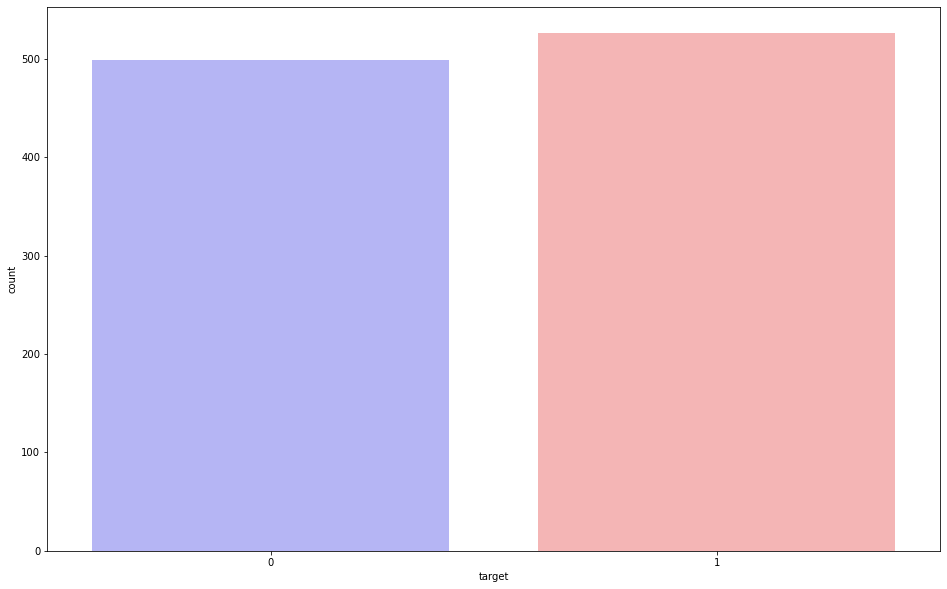

In [10]:
plt.figure(figsize=(16,10))
sns.countplot(df['target'],data=df,palette='bwr')
plt.show()

In [11]:
# length of yes & no disease 
countNodisease=len(df[df.target==0])
countYesdisease=len(df[df.target==1])

In [12]:
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNodisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countYesdisease/(len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 48.68%
Percentage of Patients Have Heart Disease: 51.32%


In [13]:
df['sex'].value_counts()

1    713
0    312
Name: sex, dtype: int64

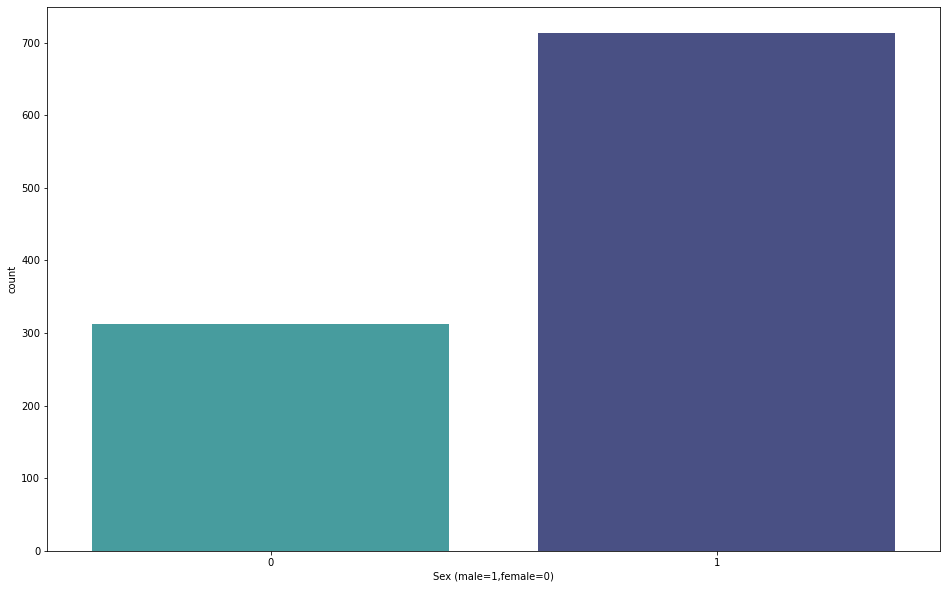

In [14]:
plt.figure(figsize=(16,10))
sns.countplot(df['sex'],data=df,palette="mako_r")
plt.xlabel('Sex (male=1,female=0)')
plt.show()

In [15]:
male=len(df[df['sex']==1])
female=len(df[df['sex']==0])

In [16]:
print("Percentage of Male Patients: {:.2f}%".format((male/(len(df['sex']==1))*100)))
print("Percentage of Female Patients: {:.2f}%".format((female/(len(df['sex']==0))*100)))

Percentage of Male Patients: 69.56%
Percentage of Female Patients: 30.44%


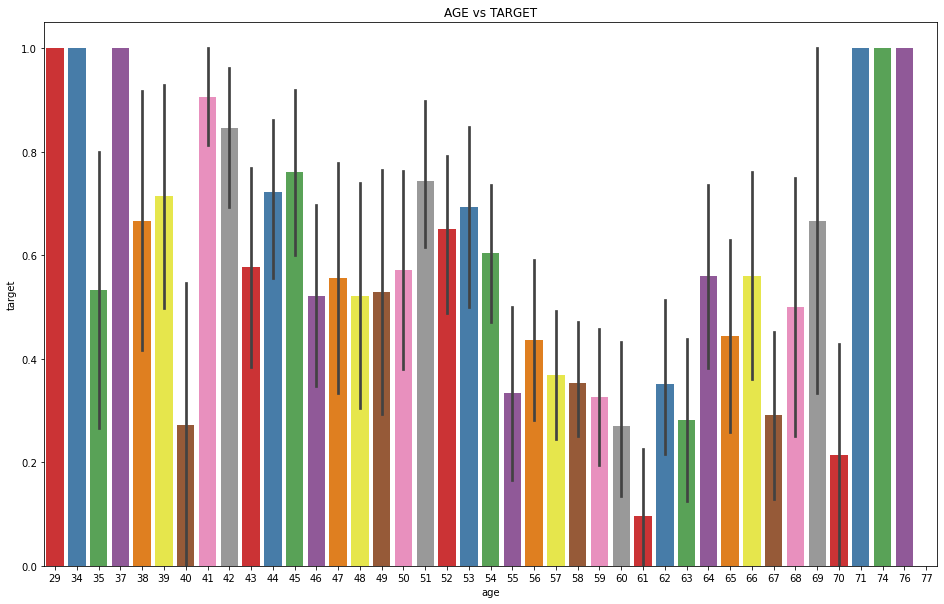

In [17]:
plt.figure(figsize=(16,10))
plt.title("AGE vs TARGET")
sns.barplot(df['age'],df['target'],data=df,palette='Set1')
plt.show()

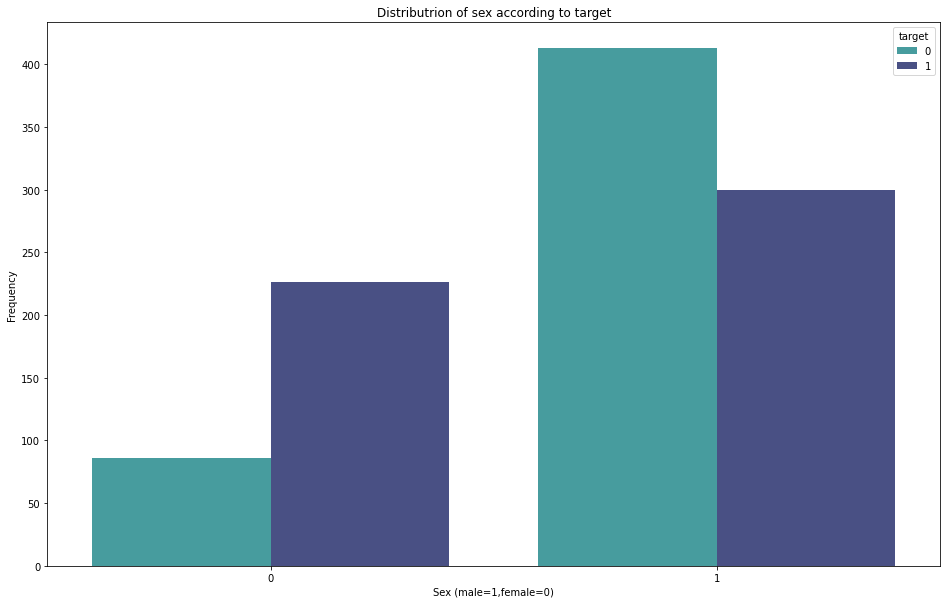

In [18]:
plt.figure(figsize=(16,10))
plt.title("Distributrion of sex according to target")
sns.countplot(df['sex'],hue='target',data=df,palette="mako_r")
plt.xlabel('Sex (male=1,female=0)')
plt.ylabel('Frequency')
plt.show()

In [19]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


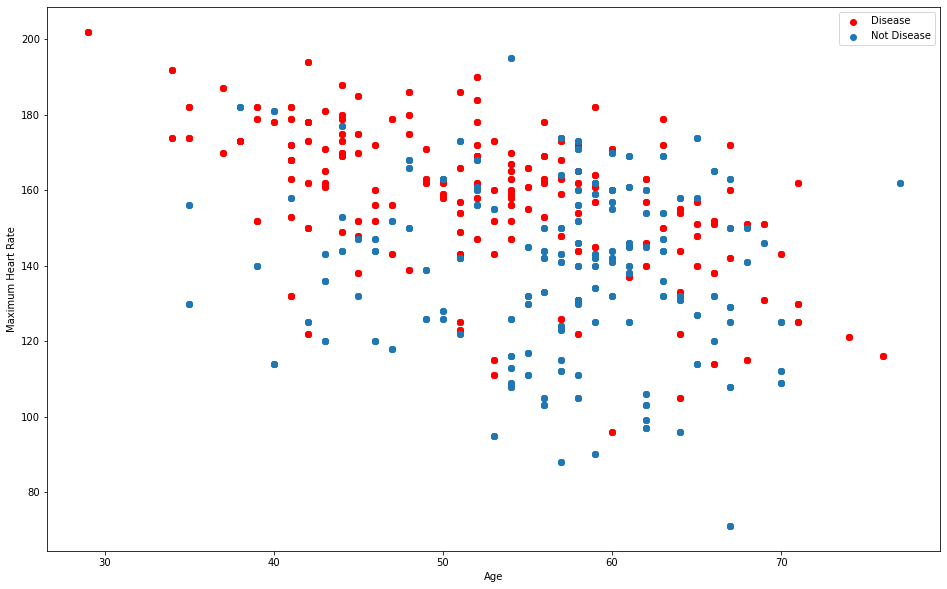

In [20]:
plt.figure(figsize=(16,10))
plt.scatter(x=df.age[df['target']==1],y=df.thalach[(df['target']==1)],c='red')
plt.scatter(x=df.age[df['target']==0],y=df.thalach[df['target']==0])
plt.xlabel('Age')
plt.ylabel("Maximum Heart Rate")
plt.legend(['Disease','Not Disease'])
plt.show()

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [22]:
# Value 0: upsloping, Value : flat, Value 3: downsloping)
df.slope.value_counts()

1    482
2    469
0     74
Name: slope, dtype: int64

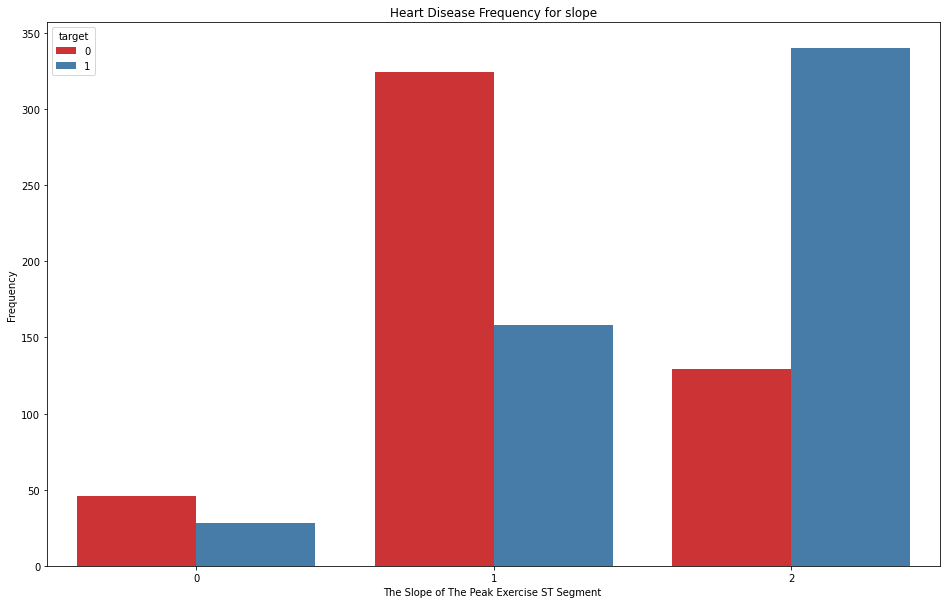

In [23]:
plt.figure(figsize=(16,10))
plt.title("Heart Disease Frequency for slope")
sns.countplot(df['slope'],data=df,palette='Set1',hue='target')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [24]:
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0


In [25]:
#  The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
df['fbs'].value_counts()

0    872
1    153
Name: fbs, dtype: int64

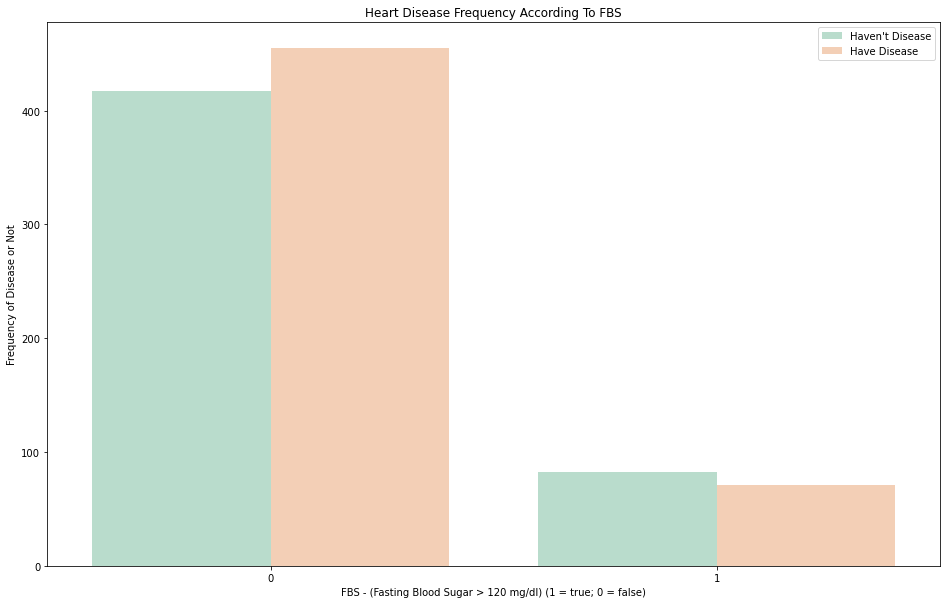

In [26]:
plt.figure(figsize=(16,10))
sns.countplot(df['fbs'],hue='target',data=df,palette='Pastel2')
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [27]:
# Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic
df['cp'].value_counts()

0    497
2    284
1    167
3     77
Name: cp, dtype: int64

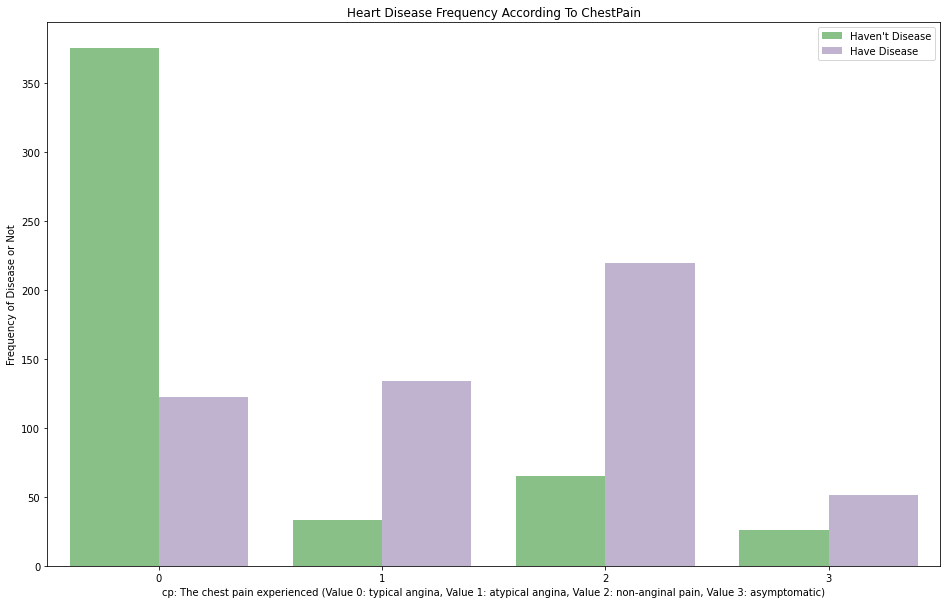

In [28]:
plt.figure(figsize=(16,10))
sns.countplot(df['cp'],hue='target',data=df,palette='Accent')
plt.title('Heart Disease Frequency According To ChestPain')
plt.xlabel('cp: The chest pain experienced (Value 0: typical angina, Value 1: atypical angina, Value 2: non-anginal pain, Value 3: asymptomatic)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency of Disease or Not')
plt.show()

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [30]:
# Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
df['restecg'].value_counts()

1    513
0    497
2     15
Name: restecg, dtype: int64

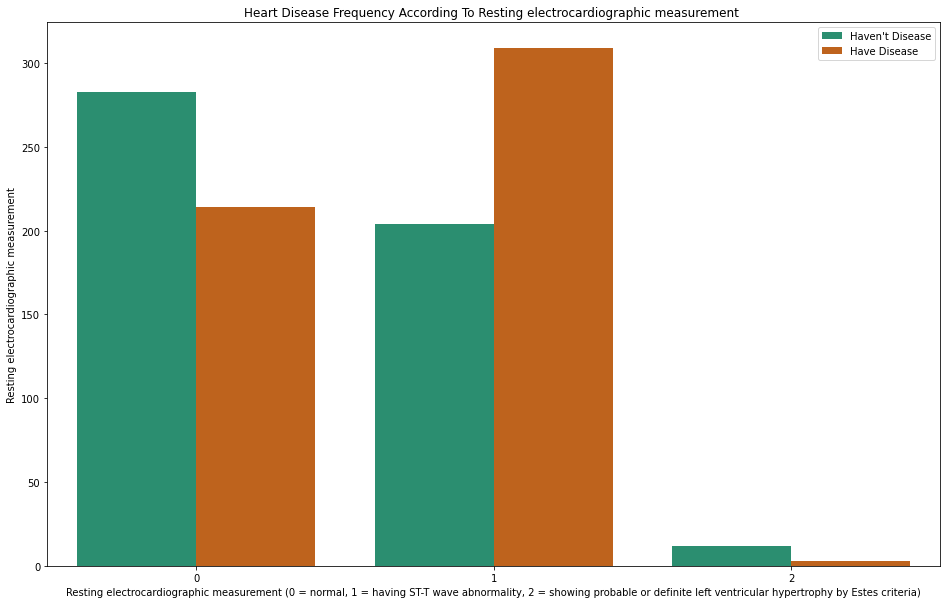

In [31]:
plt.figure(figsize=(16,10))
sns.countplot(df['restecg'],hue='target',data=df,palette='Dark2')
plt.title('Heart Disease Frequency According To Resting electrocardiographic measurement ')
plt.xlabel('Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes criteria)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Resting electrocardiographic measurement')
plt.show()

In [32]:
# Exercise induced angina (1 = yes; 0 = no)
df['exang'].value_counts()

0    680
1    345
Name: exang, dtype: int64

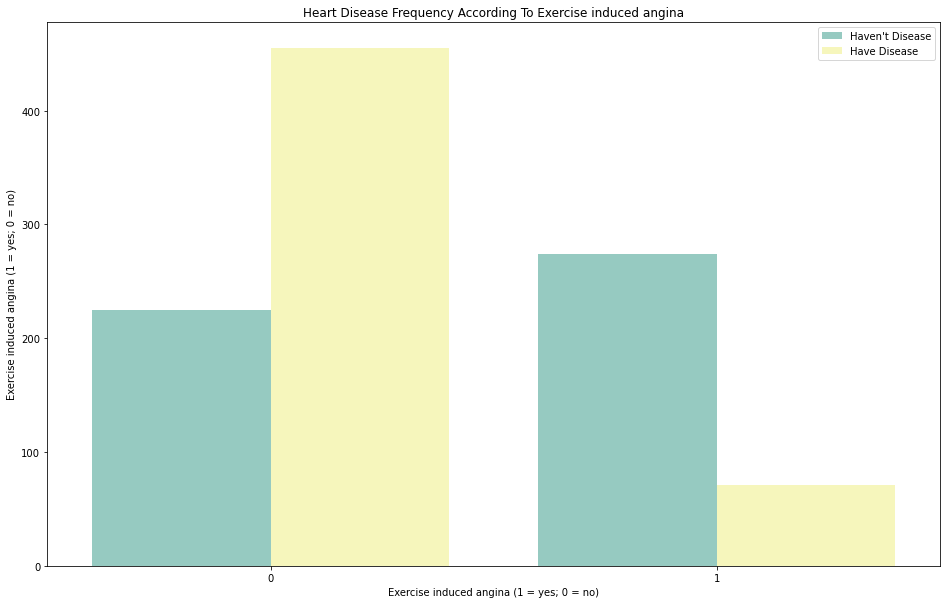

In [33]:
plt.figure(figsize=(16,10))
sns.countplot(df['exang'],hue='target',data=df,palette='Set3')
plt.title('Heart Disease Frequency According To Exercise induced angina')
plt.xlabel('Exercise induced angina (1 = yes; 0 = no)')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Exercise induced angina (1 = yes; 0 = no)')
plt.show()

In [34]:
# A blood disorder called thalassemia (0 = normal;  1= fixed defect;2= straight defect  3= reversable defect)
df['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

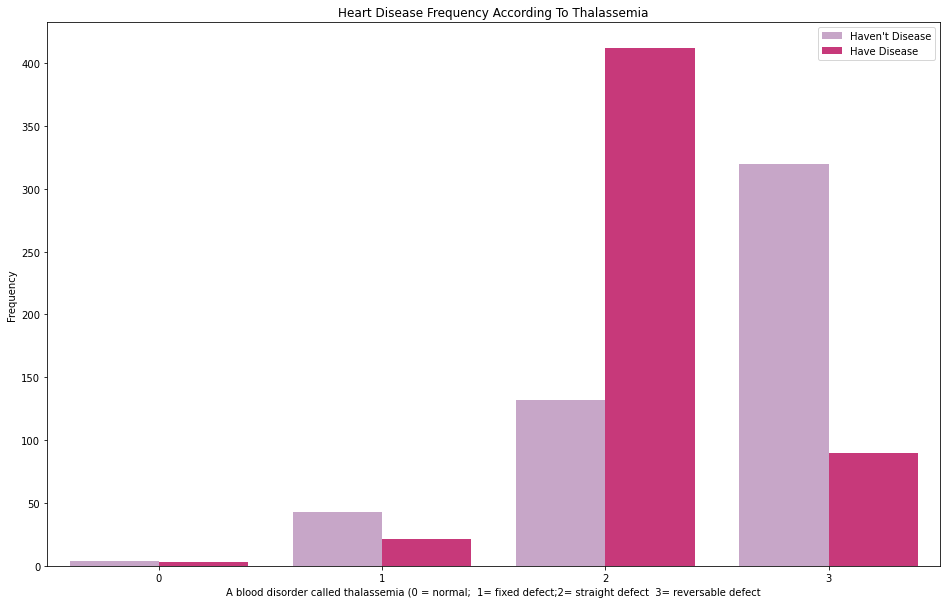

In [35]:
plt.figure(figsize=(16,10))
sns.countplot(df['thal'],hue='target',data=df,palette='PuRd')
plt.title('Heart Disease Frequency According To Thalassemia')
plt.xlabel('A blood disorder called thalassemia (0 = normal;  1= fixed defect;2= straight defect  3= reversable defect')
plt.xticks(rotation = 0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [36]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


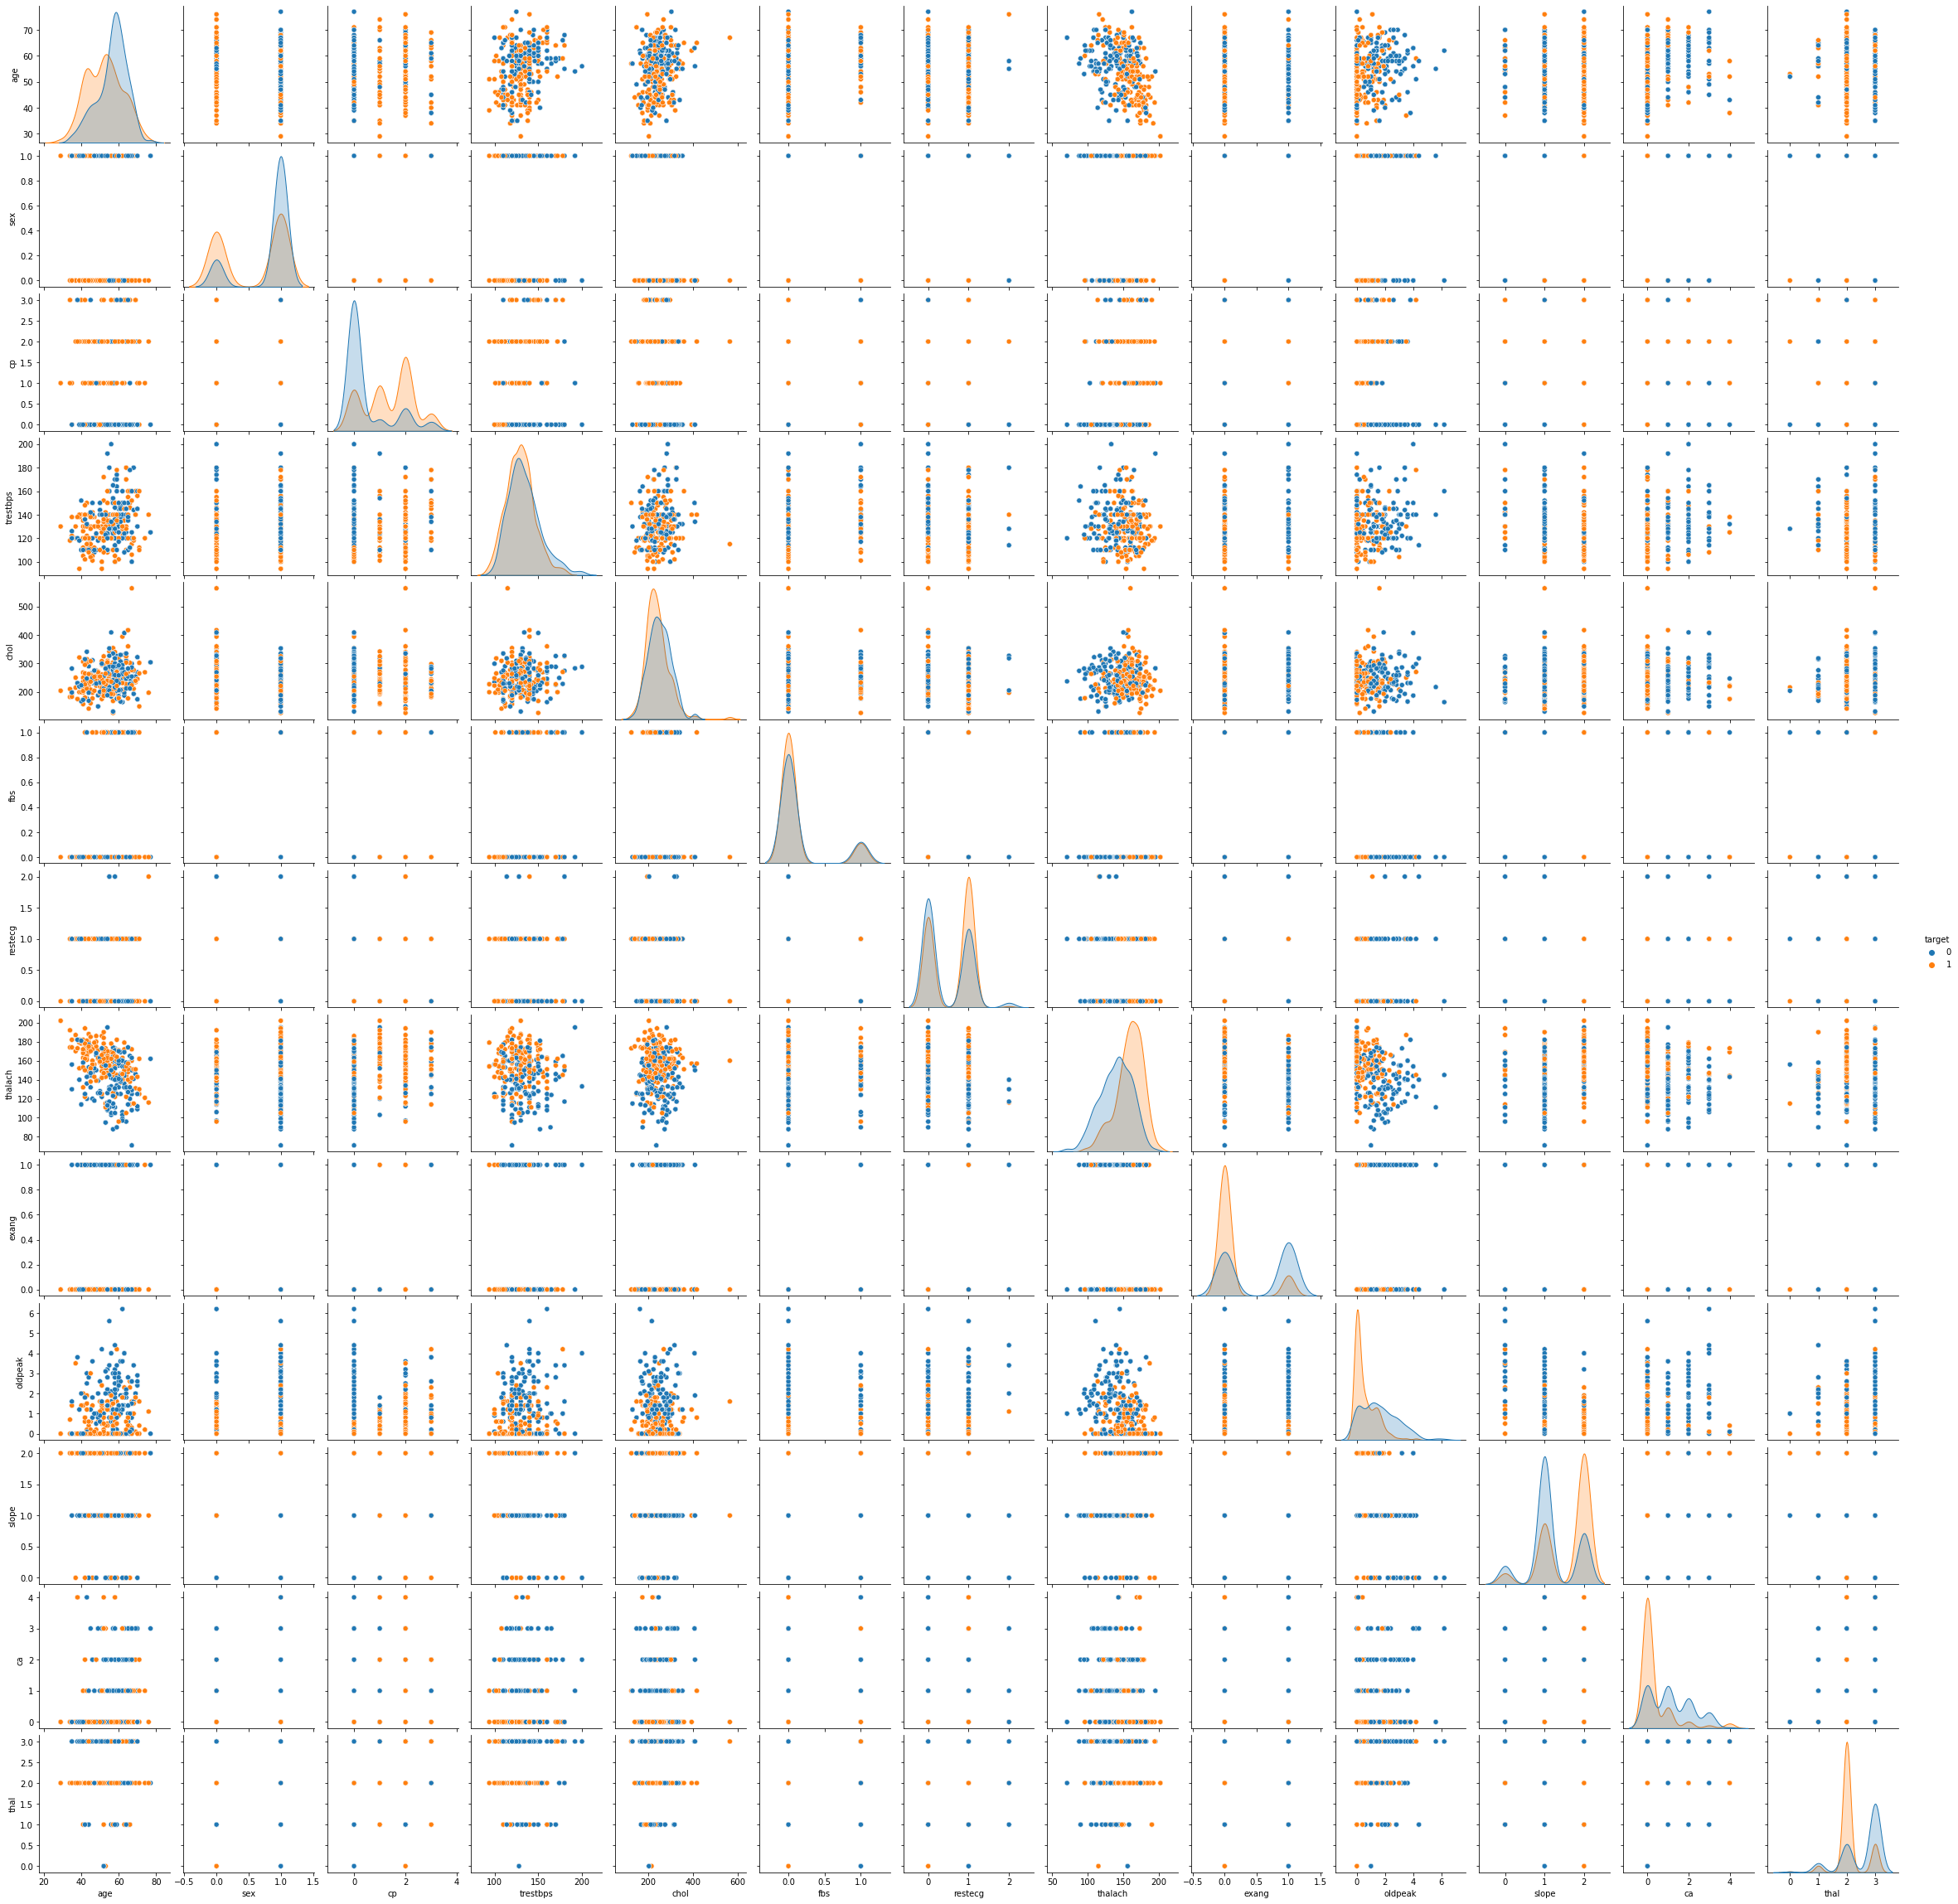

In [37]:
sns.pairplot(df,hue="target")
plt.show()

<AxesSubplot:>

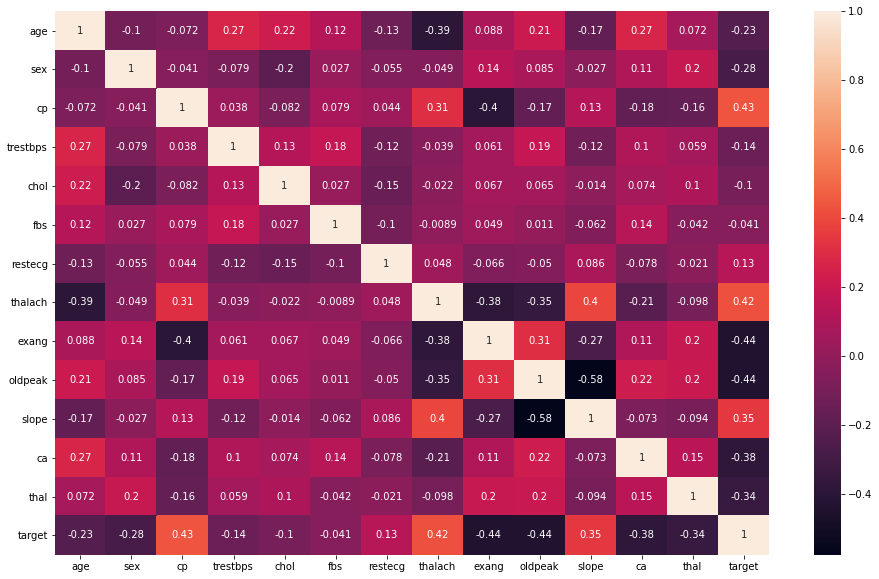

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(),annot=True)

# ONE HOT ENCODING

In [39]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [40]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,0,125,212,0,1,168,0,1.0,...,0,0,0,0,0,0,1,0,0,1
1,53,1,0,140,203,1,0,155,1,3.1,...,0,0,0,0,0,0,1,1,0,0
2,70,1,0,145,174,0,1,125,1,2.6,...,0,0,0,0,0,0,1,1,0,0
3,61,1,0,148,203,0,1,161,0,0.0,...,0,0,0,0,0,0,1,0,0,1
4,62,0,0,138,294,1,1,106,0,1.9,...,0,0,0,0,0,1,0,0,1,0


In [41]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0


In [42]:
x=df.drop(columns=['target'])
y=df['target']

In [43]:
x

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,52,1,125,212,0,1,168,0,1.0,2,...,0,0,0,0,0,0,1,0,0,1
1,53,1,140,203,1,0,155,1,3.1,0,...,0,0,0,0,0,0,1,1,0,0
2,70,1,145,174,0,1,125,1,2.6,0,...,0,0,0,0,0,0,1,1,0,0
3,61,1,148,203,0,1,161,0,0.0,1,...,0,0,0,0,0,0,1,0,0,1
4,62,0,138,294,1,1,106,0,1.9,3,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,1,164,1,0.0,0,...,1,0,0,0,0,1,0,0,0,1
1021,60,1,125,258,0,0,141,1,2.8,1,...,0,0,0,0,0,0,1,0,1,0
1022,47,1,110,275,0,0,118,1,1.0,1,...,0,0,0,0,0,1,0,0,1,0
1023,50,0,110,254,0,0,159,0,0.0,0,...,0,0,0,0,0,1,0,0,0,1


In [44]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [45]:
sd=StandardScaler()

In [46]:
x_scaled=sd.fit_transform(x)

In [47]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [48]:
x_train1,x_test1,y_train1,y_test1= train_test_split(x_scaled,y,test_size=0.2,random_state=2)

# MACHINE LEARNING MODEL BUILDING

<div style="font-family:Georgia;background-color:Black; padding:30px; font-size:17px; color:white;text-align:center">
MODEL BUILDING FOR UNSCALED DATA

</div>

In [1]:
training_score=[]
testing_score=[]

In [50]:
def model_pred_unscaled(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test,y_pred))
    print(f"Recall Score of {model} model is:",recall_score(y_test,y_pred))
    print(f"F1 Score of {model} model is:",f1_score(y_test,y_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test,y_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
Accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of DecisionTreeClassifier() model is: 1.0
Recall Score of DecisionTreeClassifier() model is: 1.0
F1 Score of DecisionTreeClassifier() model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of DecisionTreeClassifier() model is:


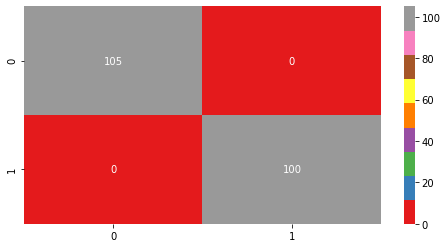

In [51]:
model_pred_unscaled(DecisionTreeClassifier())

Accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
Accuracy_Score of RandomForestClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of RandomForestClassifier() model is: 1.0
Recall Score of RandomForestClassifier() model is: 1.0
F1 Score of RandomForestClassifier() model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier() model is:


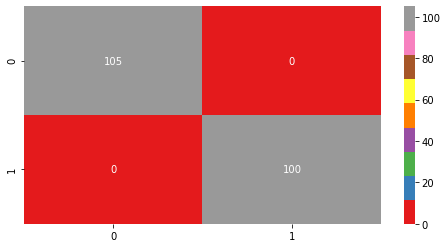

In [52]:
model_pred_unscaled(RandomForestClassifier())

Accuracy_Score of AdaBoostClassifier() model on Training Data is: 91.95121951219512
Accuracy_Score of AdaBoostClassifier() model on Testing Data is: 89.75609756097562

------------------------------------------------------------------------
Precision Score of AdaBoostClassifier() model is: 0.883495145631068
Recall Score of AdaBoostClassifier() model is: 0.91
F1 Score of AdaBoostClassifier() model is: 0.896551724137931

------------------------------------------------------------------------
Confusion Matrix of AdaBoostClassifier() model is:


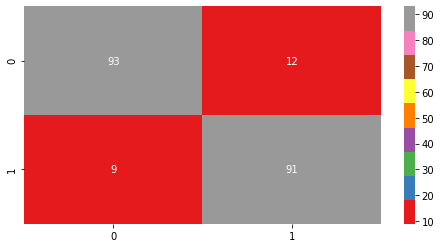

In [53]:
model_pred_unscaled(AdaBoostClassifier())

Accuracy_Score of GradientBoostingClassifier() model on Training Data is: 99.39024390243902
Accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 96.09756097560975

------------------------------------------------------------------------
Precision Score of GradientBoostingClassifier() model is: 0.9791666666666666
Recall Score of GradientBoostingClassifier() model is: 0.94
F1 Score of GradientBoostingClassifier() model is: 0.9591836734693877

------------------------------------------------------------------------
Confusion Matrix of GradientBoostingClassifier() model is:


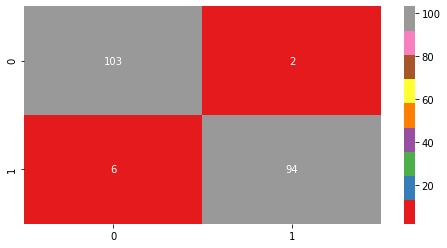

In [54]:
model_pred_unscaled(GradientBoostingClassifier())

Accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
Accuracy_Score of LGBMClassifier() model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of LGBMClassifier() model is: 1.0
Recall Score of LGBMClassifier() model is: 1.0
F1 Score of LGBMClassifier() model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of LGBMClassifier() model is:


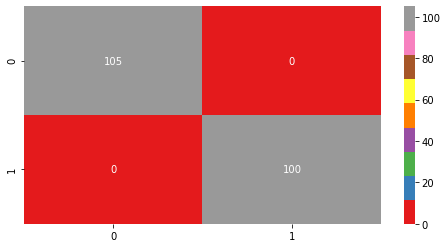

In [55]:
model_pred_unscaled(LGBMClassifier())

Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0
Accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_round

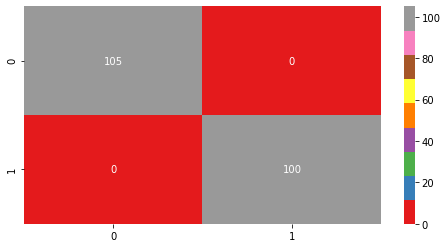

In [56]:
model_pred_unscaled(XGBClassifier())

Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model on Training Data is: 100.0
Accuracy_Score of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model on Testing Data is: 100.0

------------------------------------------------------------------------
Precision Score of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model is: 1.0
Recall Score of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model is: 1.0
F1 Score of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model is: 1.0

------------------------------------------------------------------------
Confusion Matrix of <catboost.core.CatBoostClassifier object at 0x000001B4F776EBB0> model is:


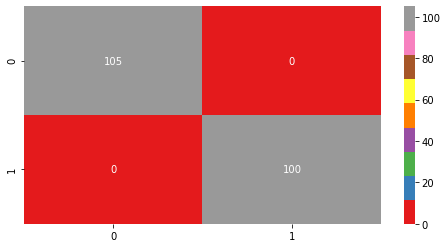

In [57]:
model_pred_unscaled(CatBoostClassifier(verbose=False))

<div style="font-family:Georgia;background-color:Black; padding:30px; font-size:17px; color:white;text-align:center">
MODEL BUILDING FOR SCALED DATA

</div>

In [58]:
def model_pred_scaled(model):
    model.fit(x_train1,y_train1)
    y_pred1=model.predict(x_test1)
    y_pred_train1=model.predict(x_train1)
    a = accuracy_score(y_train1,y_pred_train1)*100
    b = accuracy_score(y_test1,y_pred1)*100
    a.astype(int)
    b.astype(int)
    training_score.append(a)
    testing_score.append(b)
    
    print(f"Accuracy_Score of {model} model on Training Data is:",a)
    print(f"Accuracy_Score of {model} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model} model is:",precision_score(y_test1,y_pred1))
    print(f"Recall Score of {model} model is:",recall_score(y_test1,y_pred1))
    print(f"F1 Score of {model} model is:",f1_score(y_test1,y_pred1))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model} model is:")
    
    matrix= confusion_matrix(y_test1,y_pred1)
    plt.figure(figsize=(8,4))
    sns.heatmap(matrix,annot=True,fmt="g",cmap="Set1")
    plt.show()

Accuracy_Score of LogisticRegression() model on Training Data is: 84.8780487804878
Accuracy_Score of LogisticRegression() model on Testing Data is: 84.39024390243902

------------------------------------------------------------------------
Precision Score of LogisticRegression() model is: 0.8207547169811321
Recall Score of LogisticRegression() model is: 0.87
F1 Score of LogisticRegression() model is: 0.8446601941747572

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression() model is:


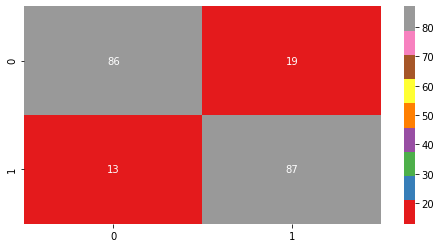

In [59]:
model_pred_scaled(LogisticRegression())

Accuracy_Score of KNeighborsClassifier() model on Training Data is: 95.48780487804878
Accuracy_Score of KNeighborsClassifier() model on Testing Data is: 84.39024390243902

------------------------------------------------------------------------
Precision Score of KNeighborsClassifier() model is: 0.8695652173913043
Recall Score of KNeighborsClassifier() model is: 0.8
F1 Score of KNeighborsClassifier() model is: 0.8333333333333333

------------------------------------------------------------------------
Confusion Matrix of KNeighborsClassifier() model is:


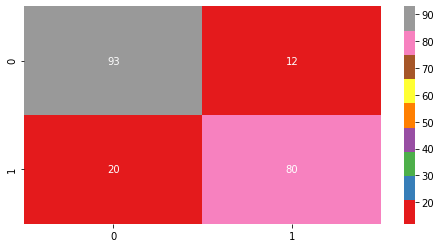

In [60]:
model_pred_scaled(KNeighborsClassifier())

Accuracy_Score of SVC() model on Training Data is: 93.65853658536587
Accuracy_Score of SVC() model on Testing Data is: 90.2439024390244

------------------------------------------------------------------------
Precision Score of SVC() model is: 0.9081632653061225
Recall Score of SVC() model is: 0.89
F1 Score of SVC() model is: 0.8989898989898989

------------------------------------------------------------------------
Confusion Matrix of SVC() model is:


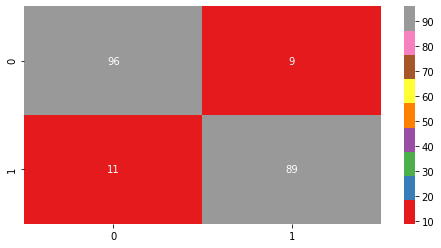

In [61]:
model_pred_scaled(SVC())

Accuracy_Score of GaussianNB() model on Training Data is: 84.7560975609756
Accuracy_Score of GaussianNB() model on Testing Data is: 84.8780487804878

------------------------------------------------------------------------
Precision Score of GaussianNB() model is: 0.8285714285714286
Recall Score of GaussianNB() model is: 0.87
F1 Score of GaussianNB() model is: 0.848780487804878

------------------------------------------------------------------------
Confusion Matrix of GaussianNB() model is:


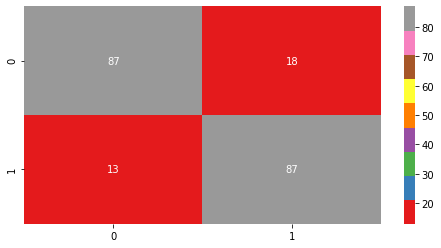

In [62]:
model_pred_scaled(GaussianNB())

In [63]:
models=['Decision Tree','Random Forest','ADA boosting','Gradient Boosting','LGBM','XGB','Cat Boosting','Logistic Regression','KNN','SVC','Gaussian Naiye bayes']

In [64]:
df1=pd.DataFrame({"Algorithms":models,"Training Score":training_score,'Testing Score':testing_score})

# Models Accuracy Comparision

In [65]:
df1

,Algorithms,Training Score,Testing Score
0,Decision Tree,100.000000,100.000000
1,Random Forest,100.000000,100.000000
2,ADA boosting,91.951220,89.756098
3,Gradient Boosting,99.390244,96.097561
4,LGBM,100.000000,100.000000
5,XGB,100.000000,100.000000
6,Cat Boosting,100.000000,100.000000
7,Logistic Regression,84.878049,84.390244
8,KNN,95.487805,84.390244
9,SVC,93.658537,90.243902


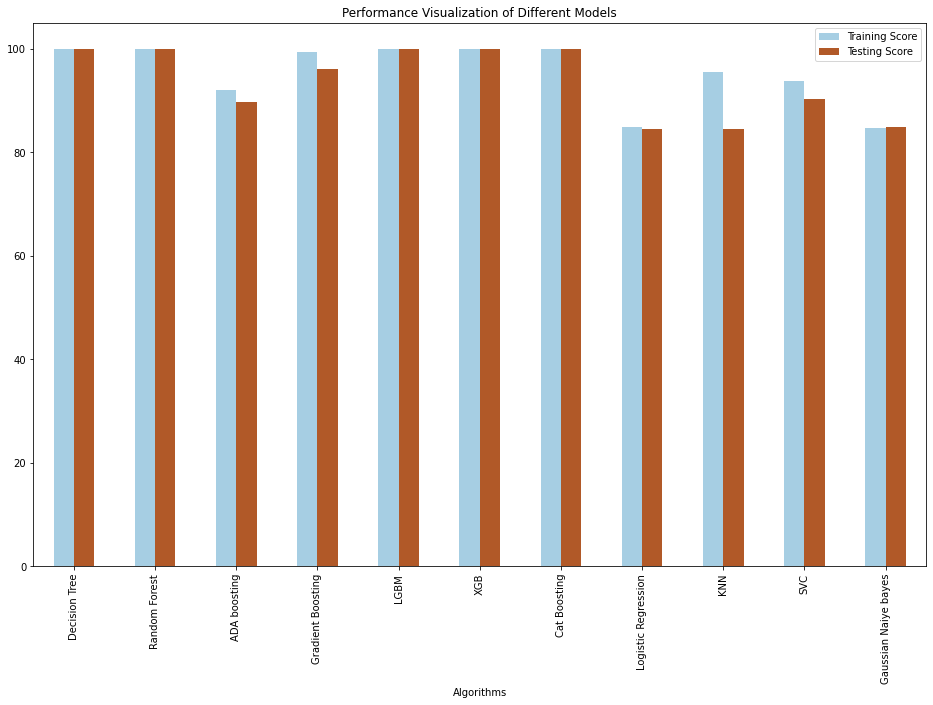

In [66]:
df1.plot(x='Algorithms',y=['Training Score','Testing Score'],colormap='Paired',figsize=(16,10),kind="bar", title="Performance Visualization of Different Models");

<div style="font-family:Georgia;background-color:purple; padding:30px; font-size:17px; color:white">

**Observation**<br>
* Highest performance was give by **Decision Tree , Random Forest , LGBM , Xgboost, catboost** with 100% accurracy.<br>
* But **SVC & **Gradient Boosting** Model performance was also good.<br>
* So we will do **Hyper-Parameter Tunning** on these 5 Models.<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:red;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of DECISION TREE Model
</p>
</div>

In [69]:
model1=DecisionTreeClassifier()

In [70]:
parameter1={'criterion':['gini','entriopy'],
    'splitter':['best','random'],
    'max_depth':range(1,20,1),
    'min_samples_split':range(1,10,1),
    'min_samples_leaf':range(4,10,1) 
}

In [71]:
grid_search1=GridSearchCV(estimator=model1,param_grid=parameter1,cv=5,n_jobs=-1)

In [72]:
grid_search1.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entriopy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(4, 10),
                         'min_samples_split': range(1, 10),
                         'splitter': ['best', 'random']})

In [73]:
grid_search1.best_score_

0.9036585365853659

In [74]:
best_parameters = grid_search1.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'splitter': 'best'}

In [75]:
model1=DecisionTreeClassifier(**best_parameters)

In [77]:
model1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=6)

In [80]:
y_pred=model1.predict(x_test)

In [81]:
y_pred_train=model1.predict(x_train)

In [82]:
accuracy_score(y_test,y_pred)*100

93.17073170731707

In [83]:
accuracy_score(y_train,y_pred_train)*100

97.3170731707317

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

**Observations**<br>

* We can clearly observe that **Decision Tree Model** is having **best fitting**.<br>
* Model doesn't have any **overfitting or underfitting**<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:blue;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of Random Forest Model
</p>
</div>

In [84]:
model4 = RandomForestClassifier()

In [85]:
parameters4 = {'n_estimators': [50,150,200,250],
               'min_samples_split':[7,8,9],
               'max_depth': [10,11,12], 
               'min_samples_leaf':[4,5,6]}

In [86]:
grid_search4 = GridSearchCV(model4, parameters4, cv=5, n_jobs=-1)

In [87]:
grid_search4.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 11, 12],
                         'min_samples_leaf': [4, 5, 6],
                         'min_samples_split': [7, 8, 9],
                         'n_estimators': [50, 150, 200, 250]})

In [88]:
grid_search4.best_score_

0.9402439024390243

In [89]:
best_parameters4 = grid_search4.best_params_
best_parameters4

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 150}

In [96]:
# Creating Random Forest Model Using Best Parameters

In [90]:
model4 = RandomForestClassifier(**best_parameters4)

In [91]:
model4.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=8,
                       n_estimators=150)

In [92]:
y_pred = model4.predict(x_test)

In [93]:
y_pred_train = model4.predict(x_train)

In [94]:
accuracy_score(y_test,y_pred)

0.9658536585365853

In [95]:
accuracy_score(y_train,y_pred_train)

0.9878048780487805

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

**Observations**<br>

* We can clearly observe that **Random Forest Model** is having **best fitting**.<br>
* Model doesn't have any **overfitting or underfitting**<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:yellow;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of LGBM Model
</p>
</div>

In [97]:
model=LGBMClassifier()

In [98]:
parameters1 = {"n_estimators":[50,1000,200,200,250],
              "learning_rate":[0.01,0.02,0.03],
              "random_state":[0,42,48,50],
               "num_leaves":[16,17,18]}

In [99]:
grid_search1 = GridSearchCV(model, parameters1, cv=5, n_jobs=-1)

In [100]:
grid_search1.fit(x_train,y_train.values.ravel())

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'n_estimators': [50, 1000, 200, 200, 250],
                         'num_leaves': [16, 17, 18],
                         'random_state': [0, 42, 48, 50]})

In [101]:
grid_search1.best_score_

0.9853658536585366

In [102]:
best_parameters1 = grid_search1.best_params_
best_parameters1

{'learning_rate': 0.03,
 'n_estimators': 200,
 'num_leaves': 17,
 'random_state': 0}

In [103]:
# Creating LGBM Model Using Best Parameters.

In [104]:
model1 = LGBMClassifier(**best_parameters1)

In [105]:
model1.fit(x_train,y_train)

LGBMClassifier(learning_rate=0.03, n_estimators=200, num_leaves=17,
               random_state=0)

In [106]:
y_pred = model1.predict(x_test)

In [107]:
y_pred_train= model1.predict(x_train)

In [108]:
accuracy_score(y_pred,y_test)

1.0

In [109]:
accuracy_score(y_pred_train,y_train)

1.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

**Observation**<br>

* We can clearly observe that our **LGBM Model** is having **best fitting**.<br>
* Model doesn't have any **overfitting or underfitting**<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:green;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of CatBoost Model
</p>
</div>

In [110]:
model2 = CatBoostClassifier(verbose=False)

In [111]:
parameters2 = {"learning_rate":[0.1,0.3,0.5,0.6,0.7],
              "random_state":[0,42,48,50],
               "depth":[8,9,10],
               "iterations":[35,40,50]}

In [112]:
grid_search2 = GridSearchCV(model2, parameters2, cv=5, n_jobs=-1)

In [113]:
grid_search2.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B4FB3A30A0>,
             n_jobs=-1,
             param_grid={'depth': [8, 9, 10], 'iterations': [35, 40, 50],
                         'learning_rate': [0.1, 0.3, 0.5, 0.6, 0.7],
                         'random_state': [0, 42, 48, 50]})

In [114]:
grid_search2.best_score_

0.9878048780487806

In [115]:
best_parameters2 = grid_search2.best_params_
best_parameters2

{'depth': 8, 'iterations': 40, 'learning_rate': 0.3, 'random_state': 48}

In [116]:
# Creating Cat Boost Model Using Best Parameters

In [117]:
model2 = CatBoostClassifier(**best_parameters2,verbose=False)

In [118]:
model2.fit(x_train,y_train)

In [119]:
y_pred = model2.predict(x_test)

In [120]:
y_pred_train=model2.predict(x_train)

In [121]:
accuracy_score(y_test,y_pred)

0.9853658536585366

In [122]:
accuracy_score(y_train,y_pred_train)

1.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

**Observations**<br>

* We can clearly observe that **CAT boost Model** is having **best fitting**.<br>
* Model doesn't have any **overfitting or underfitting**<br>
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Hyper-Parameter Tunning of XGBoost Model
</p>
</div>

In [123]:
model3 = XGBClassifier()

In [124]:
parameters3 = {"n_estimators":[50,100,150],
             "random_state":[0,42,50],
             "learning_rate":[0.1,0.3,0.5,1.0]}

In [125]:
grid_search3 = GridSearchCV(model3, parameters3 , cv=5, n_jobs=-1)

In [126]:
grid_search3.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [127]:
grid_search3.best_score_

0.9829268292682926

In [128]:
best_parameters3 = grid_search3.best_params_
best_parameters3

{'learning_rate': 0.3, 'n_estimators': 50, 'random_state': 0}

In [129]:
# Creating XGBoost Model Using Best Parameters

In [130]:
model3 = XGBClassifier(**best_parameters3)

In [131]:
model3.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=0, ...)

In [132]:
y_pred = model3.predict(x_test)

In [133]:
y_pred_train = model3.predict(x_train)

In [134]:
accuracy_score(y_test,y_pred)

1.0

In [135]:
accuracy_score(y_train,y_pred_train)

1.0

<div style="font-family:Georgia;background-color:aliceblue; padding:30px; font-size:17px">

**Observations**<br>

* We can clearly observe that **XGboost** is having **best fitting**.<br>
* Model doesn't have any **overfitting or underfitting**<br>
</div>

# Conclusion

<div style="font-family:Georgia;background-color:orange; padding:30px; font-size:17px; color:white;">

**CONCLUSION**<br>

* We can clearly observe that **XGboost and LightGBM** is having **best fitting among all models with 100% accuracy**.<br>
